In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
lung_cancer = pd.read_csv("cancer patient data sets.csv")

In [3]:
lung_cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
lung_cancer.drop(columns=['index','Patient Id'], axis=1, inplace=True)

In [6]:
lung_cancer

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
lung_cancer.rename(columns ={'Air Pollution':'Air_Pollution','Alcohol use':'Alcohol_use','Dust Allergy':'Dust_Allergy','OccuPational Hazards':'OccuPational_Hazards','Genetic Risk':'Genetic_Risk','chronic Lung Disease':'Chronic_Lung_Disease','Balanced Diet':'Balanced_Diet','Passive Smoker':'Passive_Smoker','Chest Pain':'Chest_Pain','Coughing of Blood':'Coughing_of_Blood','Weight Loss':'Weight_Loss','Shortness of Breath':'Shortness_of_Breath','Swallowing Difficulty':'Swallowing_Difficulty','Clubbing of Finger Nails':'Clubbing_of_Finger_Nails','Frequent Cold':'Frequent_Cold','Dry Cough':'Dry_Cough'},inplace=True)

In [8]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air_Pollution             1000 non-null   int64 
 3   Alcohol_use               1000 non-null   int64 
 4   Dust_Allergy              1000 non-null   int64 
 5   OccuPational_Hazards      1000 non-null   int64 
 6   Genetic_Risk              1000 non-null   int64 
 7   Chronic_Lung_Disease      1000 non-null   int64 
 8   Balanced_Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive_Smoker            1000 non-null   int64 
 12  Chest_Pain                1000 non-null   int64 
 13  Coughing_of_Blood         1000 non-null   int64 
 14  Fatigue                  

#### Kolon isimlerini düzenledik

In [9]:
lung_cancer.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

#### Sayısallaştırma yapalım.

In [10]:
lung_cancer['Level'] = lung_cancer.Level.replace({"Low":1,"Medium":2, "High":3})

In [11]:
lung_cancer.Level.unique()

array([1, 2, 3], dtype=int64)

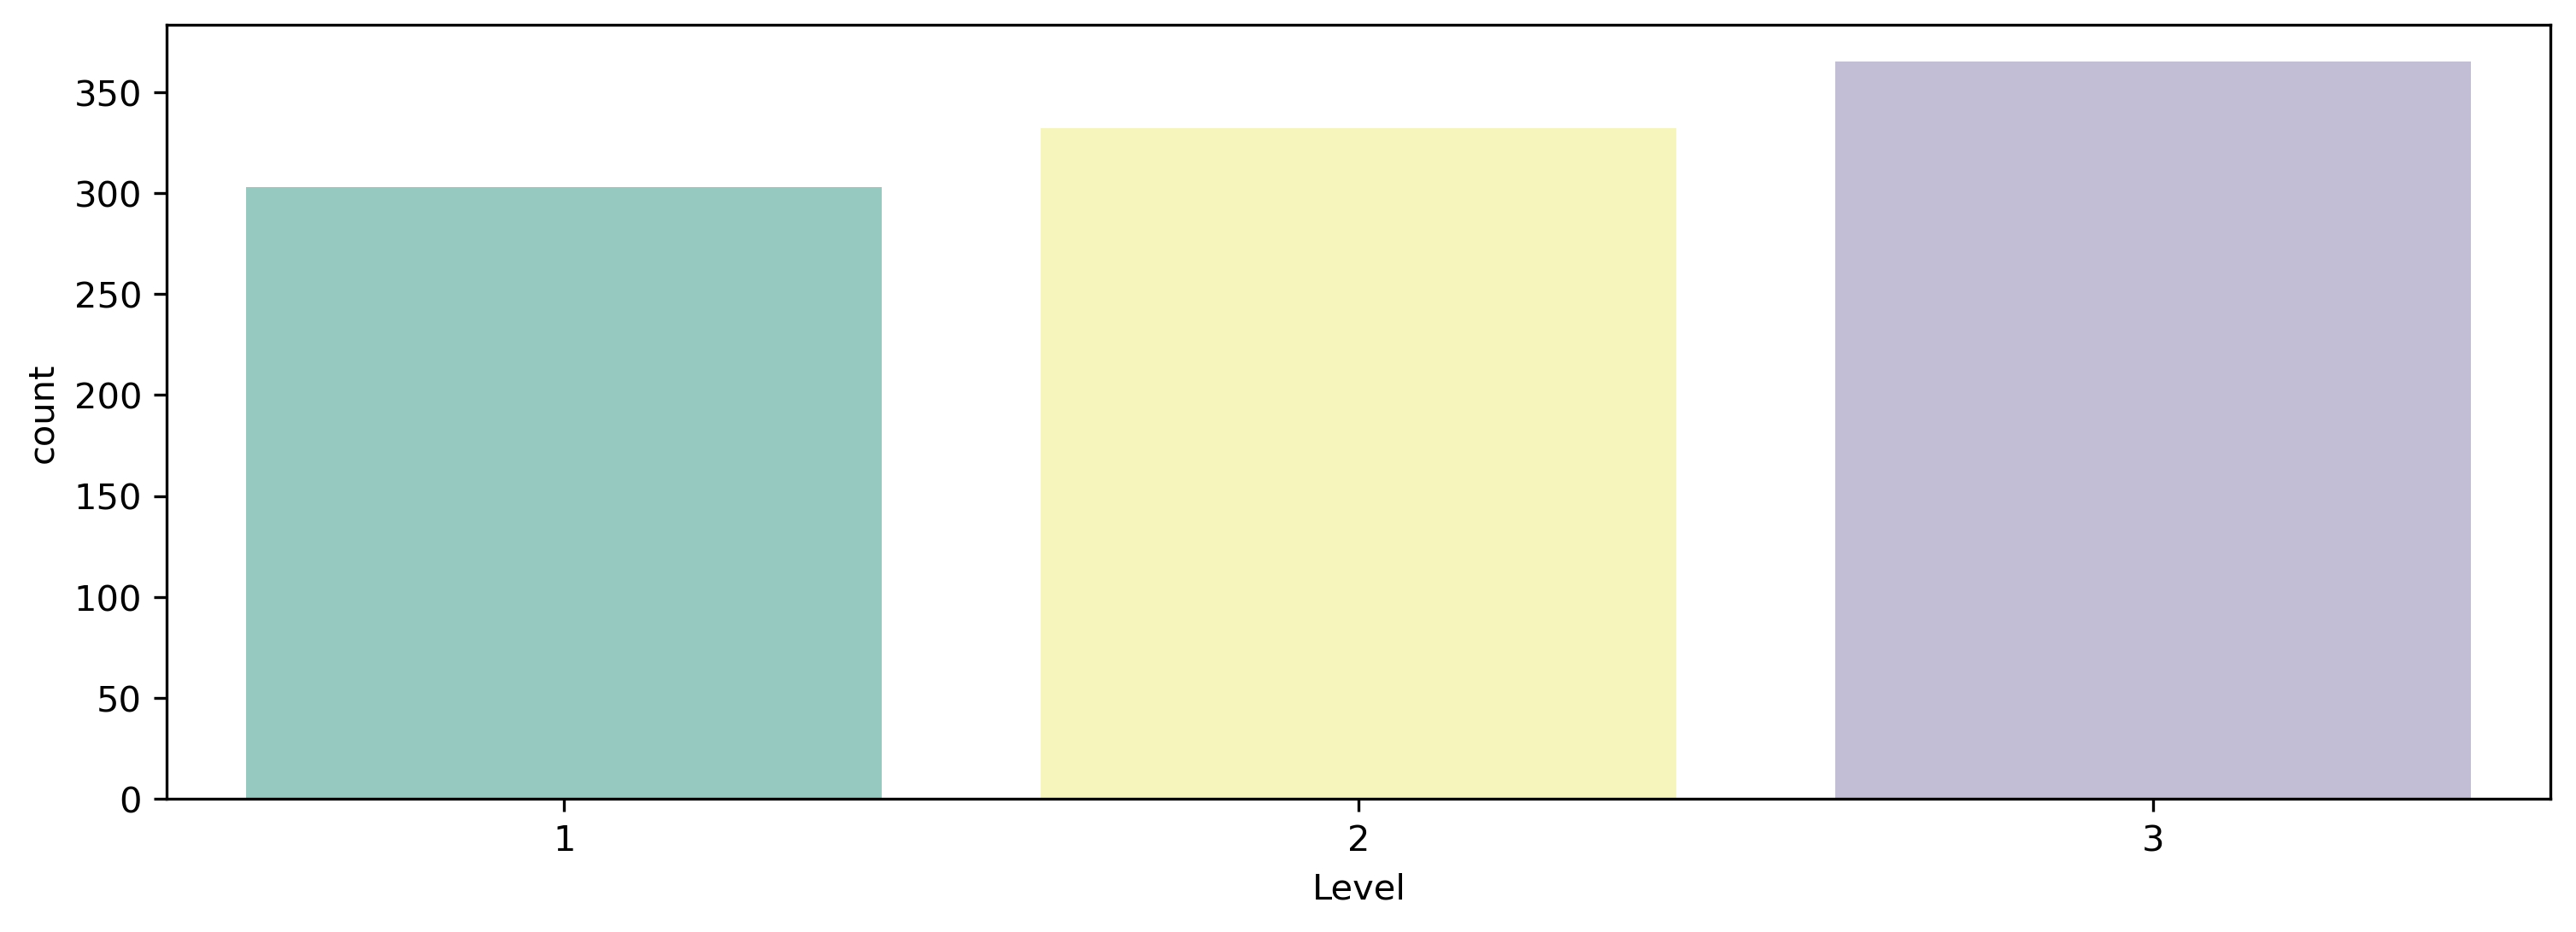

In [12]:
plt.figure(figsize=(12,4), dpi=300)
sns.countplot(x='Level', data= lung_cancer, palette="Set3")
plt.xticks(rotation=0)
plt.show()

In [13]:
lung_cancer.describe()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,Chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


#### Yaş ortalamasına baktığımızda 37 olduğunu görmekteyiz. En küçük kişi 14, en büyük kişi 73 yaşındadır.

#### Öncelikle Lojistik Regresyon uygulayalım.

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split
y=lung_cancer['Level']
X=lung_cancer.drop(columns=['Level'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=111)

In [16]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
egitim_dogruluk=log_reg.score(X_train, y_train)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest','-'*20,
     'Modelin eğitim verisindeki doğruluğu: {:.2f}'.format(egitim_dogruluk),
     'Modelin test verisindeki doğruluğu: {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu: 0.99
Modelin test verisindeki doğruluğu: 0.98


#### Aynısını softmax ile deneyelim.

In [19]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, y_train)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.99
Modelin test verisindeki doğruluğu   : 0.98


#### Aynı doğruluk değerini elde ettik.

#### c değerlerini değiştirerek doğruluk değerlerinin değişip değişmeyeceğine bakalım.

In [20]:
C_değerleri = [10**a for a in range(-2,6)]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_train, y_train),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.01,0.9675,0.930
1,0.10,0.9925,0.980
2,1.00,0.9950,0.985
3,10.00,1.0000,0.985
4,100.00,1.0000,0.985
5,1000.00,1.0000,0.990
6,10000.00,1.0000,0.985
7,100000.00,1.0000,0.985


#### En iyi doğruluk değerleri c=1000 olduğunda elde edildi. Eğitim doğruluğu %100 çıkarken test doğruluğu %99 çıktı.

### Supervised Machine Learning algoritmalarını deneyerek modelimizi geliştirmeye çalışalım.

### kNN İle Sınıflandırma

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [26]:
knn.score(X_test, y_test)

0.925

In [36]:
from sklearn.model_selection import cross_val_score

cvscores_2 = cross_val_score(knn, X_test, y_test, cv=2)
print('cv =  2 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_2)))

cvscores_5 = cross_val_score(knn, X_test, y_test, cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_5)))

cvscores_10 = cross_val_score(knn, X_test, y_test, cv=10)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_10)))

cvscores_14 = cross_val_score(knn, X_test, y_test, cv=14)
print('cv = 14 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_14)))

cvscores_15 = cross_val_score(knn, X_test, y_test, cv=15)
print('cv = 15 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_15)))

cvscores_16 = cross_val_score(knn, X_test, y_test, cv=16)
print('cv = 16 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_16)))

cvscores_18 = cross_val_score(knn, X_test, y_test, cv=18)
print('cv = 18 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_18)))

cvscores_20 = cross_val_score(knn, X_test, y_test, cv=20)
print('cv = 20 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_20)))


cvscores_22 = cross_val_score(knn, X_test, y_test, cv=22)
print('cv = 22 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_22)))

cvscores_23 = cross_val_score(knn, X_test, y_test, cv=23)
print('cv = 23 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_23)))

cvscores_24 = cross_val_score(knn, X_test, y_test, cv=24)
print('cv = 24 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_24)))


cvscores_28 = cross_val_score(knn, X_test, y_test, cv=28)
print('cv = 28 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_28)))

cvscores_35 = cross_val_score(knn, X_test, y_test, cv=35)
print('cv = 35 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_35)))

cv =  2 ---> Ortalama çarpraz doğrulama skoru : 0.71 
cv = 5 ---> Ortalama çarpraz doğrulama skoru : 0.77 
cv = 10 ---> Ortalama çarpraz doğrulama skoru : 0.80 
cv = 14 ---> Ortalama çarpraz doğrulama skoru : 0.81 
cv = 15 ---> Ortalama çarpraz doğrulama skoru : 0.81 
cv = 16 ---> Ortalama çarpraz doğrulama skoru : 0.83 
cv = 18 ---> Ortalama çarpraz doğrulama skoru : 0.83 
cv = 20 ---> Ortalama çarpraz doğrulama skoru : 0.83 
cv = 22 ---> Ortalama çarpraz doğrulama skoru : 0.83 
cv = 23 ---> Ortalama çarpraz doğrulama skoru : 0.83 
cv = 24 ---> Ortalama çarpraz doğrulama skoru : 0.82 
cv = 28 ---> Ortalama çarpraz doğrulama skoru : 0.82 
cv = 35 ---> Ortalama çarpraz doğrulama skoru : 0.80 


Çapraz doğrulama skorlarına bakıldığında cv değeri 16 olduğunda 0.83 e çıktığı ve 23'den sonra düşmeye başladığı görülmektedir.

Ağırlıklandırma ile de deneyelim.

In [37]:
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

X_zscore = stats.zscore(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.93

Ağırlıklandırma ile doğruluk değeri %93'e çıktı.

### Karar Ağaçları İle Sınıflandırma Yapalım.

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
karar_agaci.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=1337)

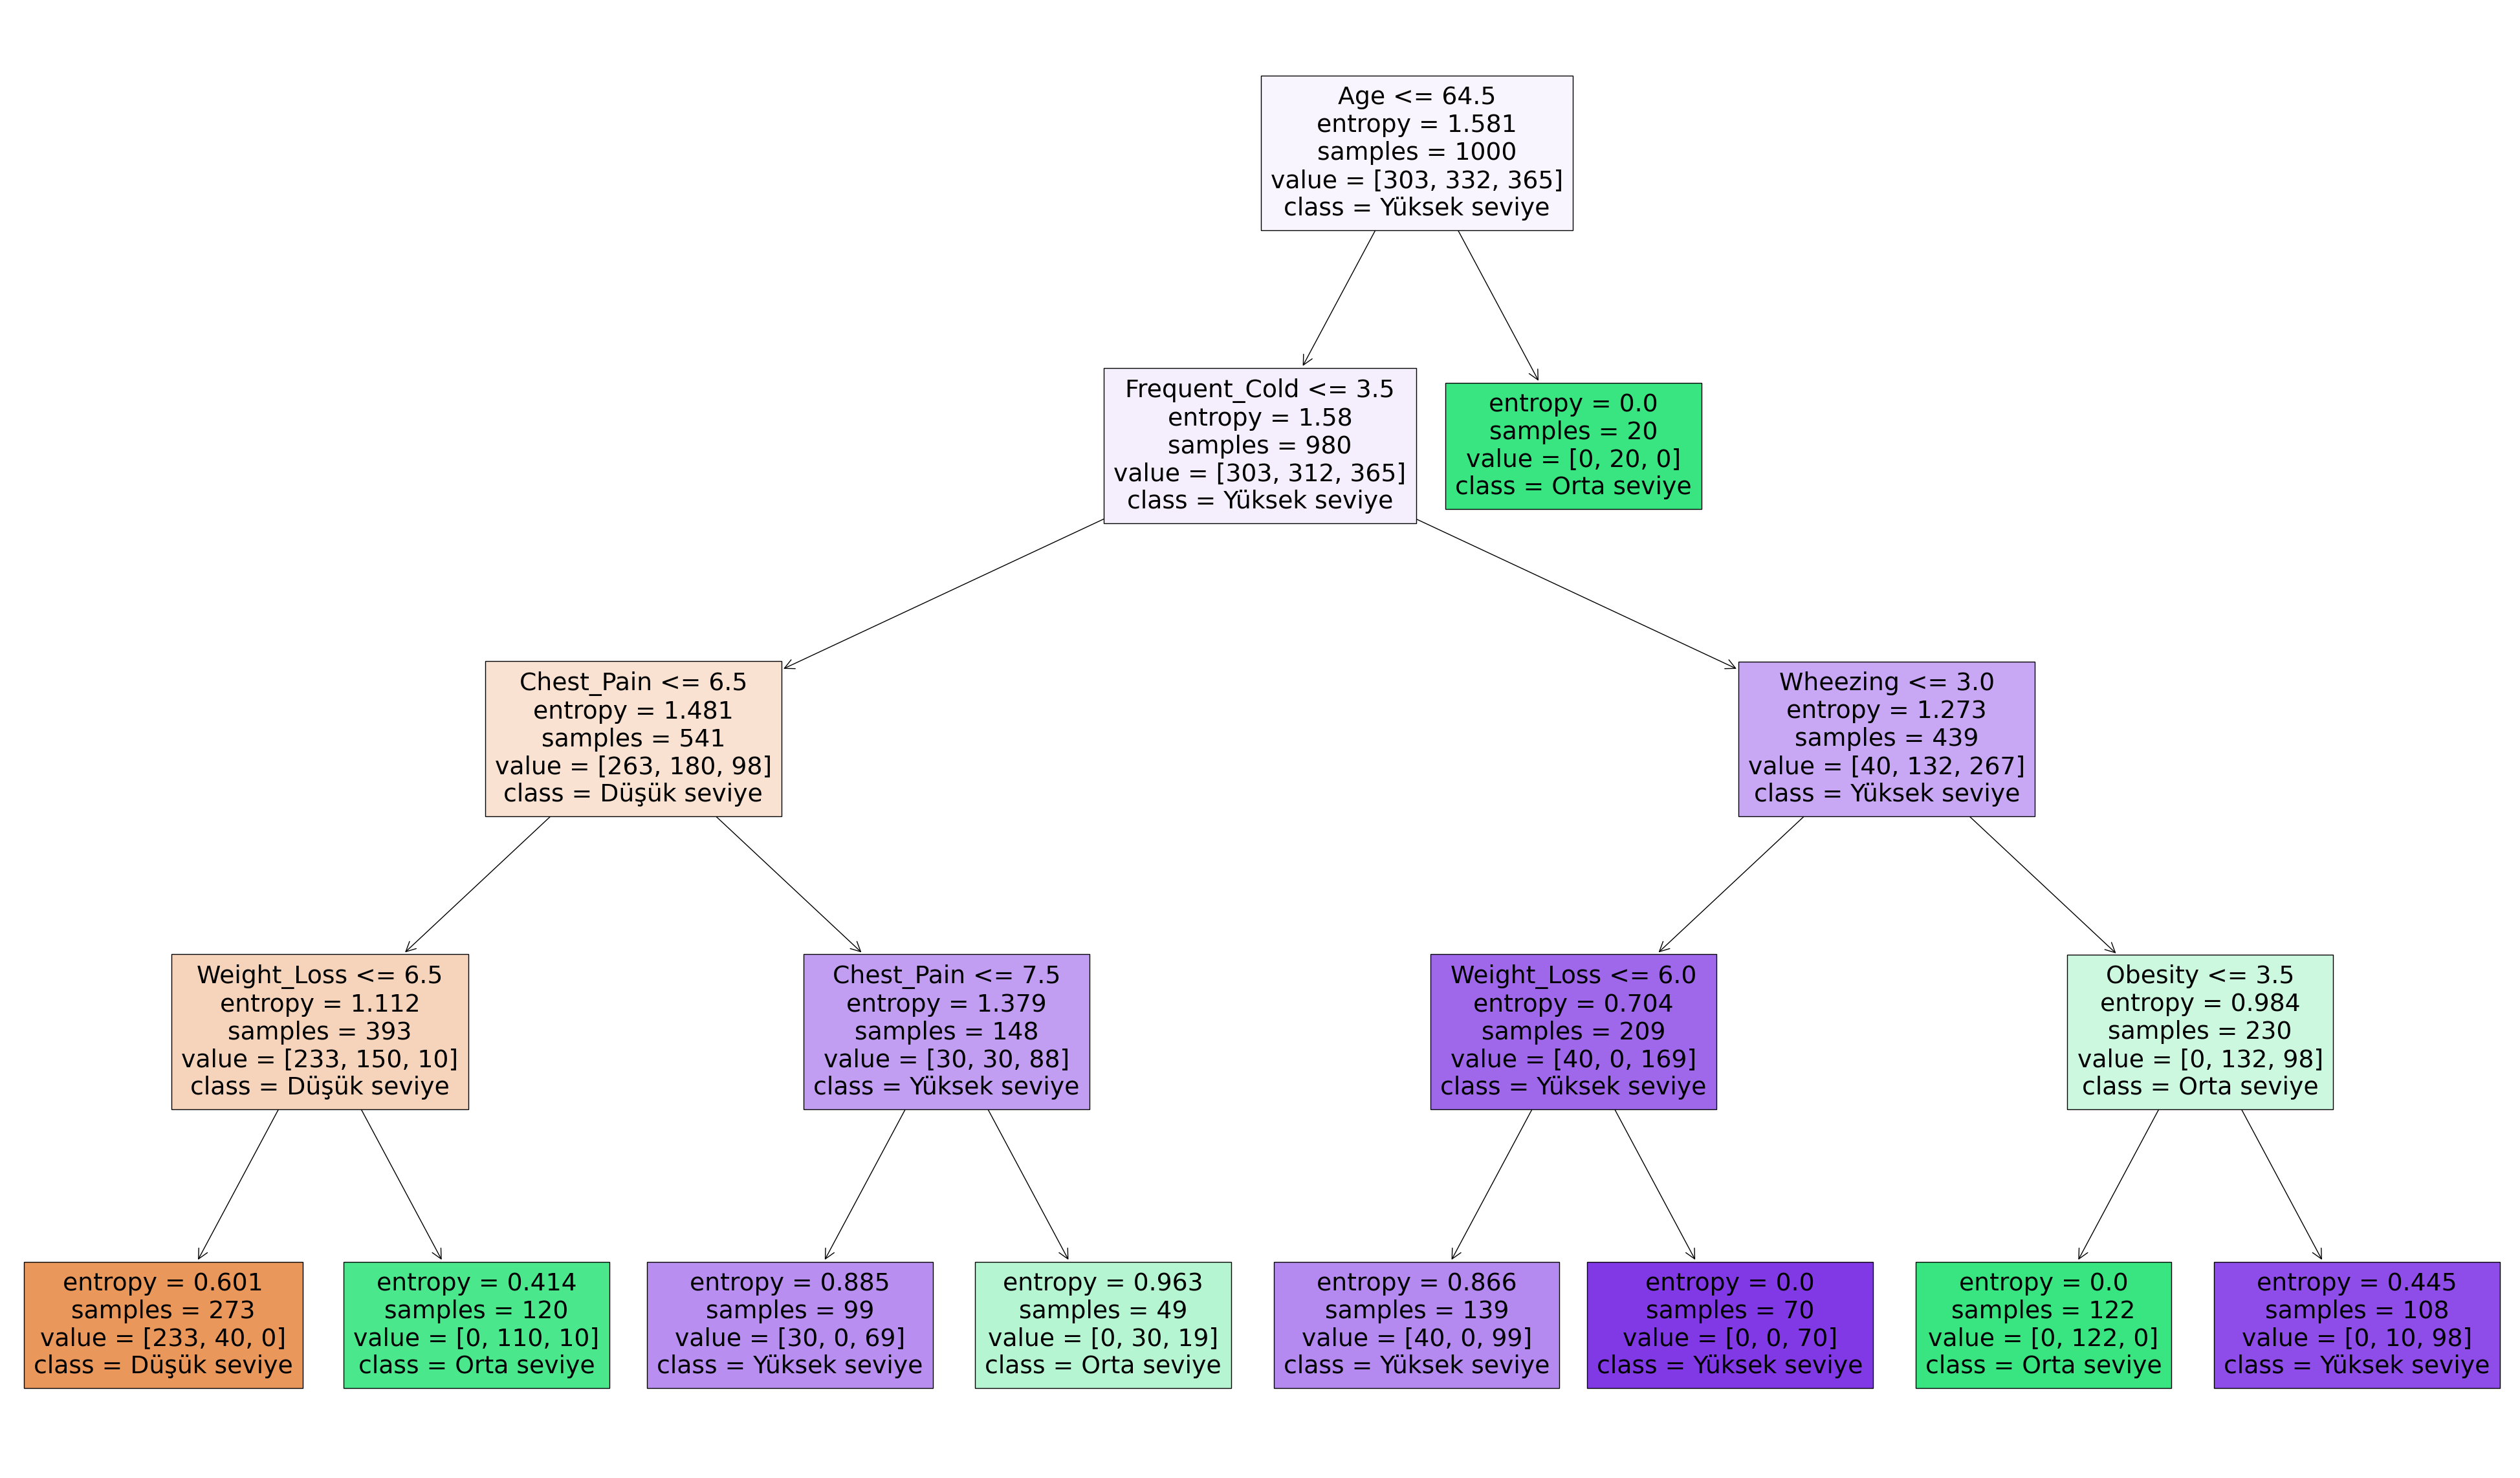

In [39]:
from sklearn import tree
plt.figure(figsize=(50, 30), dpi=100)
tree.plot_tree(decision_tree = karar_agaci,
               feature_names=X.columns,
               class_names=['Düşük seviye', 'Orta seviye', 'Yüksek seviye'],
               filled = True
              )
plt.show()

In [40]:
kanser_karar_agaci = DecisionTreeClassifier(criterion='entropy', max_features=1,
                                     max_depth=4,random_state = 100)
kanser_karar_agaci.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=100)

In [41]:
from sklearn.metrics import accuracy_score
y_tahmin_ka = kanser_karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.81


#### Daha önceki değerlere göre daha düşük bir doğruluk değeri elde ettik. Bir kaç parametreyi değiştirelim.

In [43]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=6,
    random_state = 1337
)
karar_agaci.fit(X, y)
y_tahmin_ka = kanser_karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.81


Değer değişmedi.

In [44]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=5,
    random_state = 1337
)
karar_agaci.fit(X, y)
y_tahmin_ka = kanser_karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.81


Değerler 3 denemede de değişmedi.

### Random Forest algoritması ile deneyelim.

In [45]:
from sklearn.ensemble import RandomForestClassifier
rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [46]:
y_tahmin_ro = rastgele_orman.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 1.00


Doğruluk değeri %100 çıktı.

Random Search uyguladığımızda neler değiştiğini görmek için onu da uygulayalım.

In [49]:
rf = RandomForestClassifier(random_state = 35)

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=3, random_state=35, n_jobs = -1)
rf_random.fit(X,y)

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 9, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [50]:
y_tahmin_ro = rf_random.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.28


Doğruluk değeri ciddi anlamda düşüş yaşadı.

### Support Vector Machines (SVM) İle Sınıflandırma

In [51]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Parametler oynadığında neler oluyor bakalım.

In [54]:
kernel_listesi = ['linear', 'rbf', 'poly']
for kernel in kernel_listesi:
    svc = SVC(kernel= kernel, C=1)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy with {} : {}'.format(kernel,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy with linear : 1.0
------------------------------------
Accuracy with rbf : 1.0
------------------------------------
Accuracy with poly : 1.0
------------------------------------


In [55]:
gamma_listesi = [10**a for a in range(-5,3)]
for gamma in gamma_listesi:
    svc = SVC(kernel='rbf',gamma=gamma)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy when gamma is: {} : {}'.format(gamma,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy when gamma is: 1e-05 : 0.43
------------------------------------
Accuracy when gamma is: 0.0001 : 0.675
------------------------------------
Accuracy when gamma is: 0.001 : 0.975
------------------------------------
Accuracy when gamma is: 0.01 : 0.99
------------------------------------
Accuracy when gamma is: 0.1 : 1.0
------------------------------------
Accuracy when gamma is: 1 : 0.995
------------------------------------
Accuracy when gamma is: 10 : 0.985
------------------------------------
Accuracy when gamma is: 100 : 0.97
------------------------------------


Gamma değeri 0.1 iken en yüksek doğruluk değeri elde edilmektedir.

In [56]:
c_listesi = [10**a for a in range(-2,4)]

for c in c_listesi:
    svc = SVC(kernel='rbf',C = c)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy when c is: {} : {}'.format(c,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy when c is: 0.01 : 0.67
------------------------------------
Accuracy when c is: 0.1 : 0.99
------------------------------------
Accuracy when c is: 1 : 1.0
------------------------------------
Accuracy when c is: 10 : 1.0
------------------------------------
Accuracy when c is: 100 : 1.0
------------------------------------
Accuracy when c is: 1000 : 1.0
------------------------------------


c değeri 0.1 den sonra çok yüksek değerlere sahip olmuştur.

In [57]:
degree_listesi = [0.1,1,10,20,30,35,40]

for degree in degree_listesi:
    svc = SVC(kernel='poly',degree=degree)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy when degree is: {} : {}'.format(degree,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy when degree is: 0.1 : 0.43
------------------------------------
Accuracy when degree is: 1 : 1.0
------------------------------------
Accuracy when degree is: 10 : 0.915
------------------------------------
Accuracy when degree is: 20 : 0.835
------------------------------------
Accuracy when degree is: 30 : 0.82
------------------------------------
Accuracy when degree is: 35 : 0.82
------------------------------------
Accuracy when degree is: 40 : 0.82
------------------------------------


degree değeri 1 iken en yüksek doğruluk değeri elde edilmiştir.

In [59]:
#en iyi değerlerin hepsini bir arada çalıştıralım.

svc = SVC(kernel='rbf',C=0.1,gamma = 0.1)
svc.fit(X_train, y_train)
y_tahmin = svc.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_tahmin)))

Accuracy: 1.0


#### Accuracy değeri %100 olarak elde edilmiştir.

### LightGBM İle Sınıflandırma

In [64]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [65]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10,
          'force_row_wise':True,
          'verbose': -1
          ,
         }

In [66]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100, verbose_eval=False)

In [72]:
from sklearn.metrics import accuracy_score
y_tahmin=lgb_model.predict(X_test)
y_tahmin = [1 if tahmin <0.1 else 2 if tahmin < 0.5 else 3 for tahmin in y_tahmin]
dogruluk=accuracy_score(y_tahmin,y_test)
dogruluk

0.43

Doğruluk değerini çok düşük elde ettik.

### Modelimiz Unsupervised Machine Learning'de Nasıl Performans Gönderiyor Ona Bakalım.

#### kMeans Algoritması

In [74]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [75]:
lung_cancer = pd.read_csv("cancer patient data sets.csv")

In [76]:
lung_cancer.drop(columns=['index','Patient Id'], axis=1, inplace=True)

In [77]:
lung_cancer.rename(columns ={'Air Pollution':'Air_Pollution','Alcohol use':'Alcohol_use','Dust Allergy':'Dust_Allergy','OccuPational Hazards':'OccuPational_Hazards','Genetic Risk':'Genetic_Risk','chronic Lung Disease':'Chronic_Lung_Disease','Balanced Diet':'Balanced_Diet','Passive Smoker':'Passive_Smoker','Chest Pain':'Chest_Pain','Coughing of Blood':'Coughing_of_Blood','Weight Loss':'Weight_Loss','Shortness of Breath':'Shortness_of_Breath','Swallowing Difficulty':'Swallowing_Difficulty','Clubbing of Finger Nails':'Clubbing_of_Finger_Nails','Frequent Cold':'Frequent_Cold','Dry Cough':'Dry_Cough'},inplace=True)

In [78]:
lung_cancer['Level'] = lung_cancer.Level.replace({"Low":1,"Medium":2, "High":3})

In [79]:
y = lung_cancer['Level']
X = lung_cancer.drop(columns=['Level'], axis=1)

In [80]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [81]:
ytahmin = pd.DataFrame()

for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

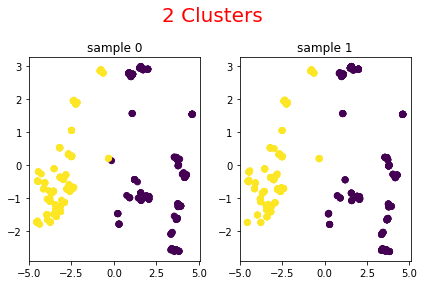

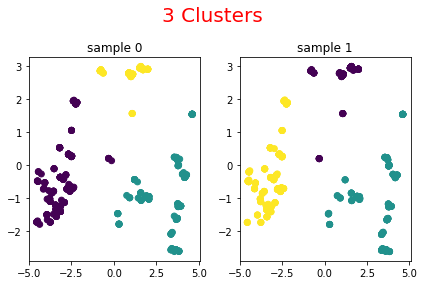

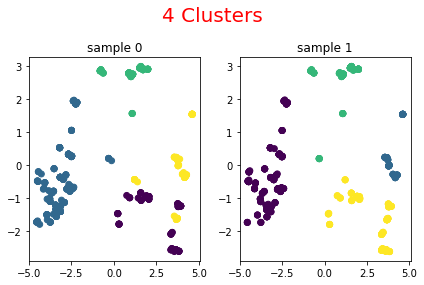

In [84]:
for cluster in range(2, 5):
    
    f, axarr = plt.subplots(1, 2)
    
    for i in range(2):
        
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20 , color = 'red')
    plt.tight_layout()
    plt.show()
    print('\n')

Üçlü kümelemeye bakıldığında bayağı güzel şekilde ayırdığı görülmektedir.

In [85]:
tam_tahmin = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

In [87]:
pd.crosstab(y, tam_tahmin)

col_0,0,1,2
Level,,,
1,283,20,0
2,162,70,100
3,0,285,80


In [88]:
metrics.adjusted_rand_score(y, tam_tahmin)

0.36981145057806847

0'ın rastgele etiketlenmeyi ve 1'in temel gerçeğin mükemmel bir şekilde kopyalandığını gösterir. Buradaki sonuca baktığımızda, değerler ortalamaya yakın olmakla beraber rastgele etiketlenmeye de yakın çıkmıştır. 

In [89]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)
rand_index_score(y, tam_tahmin)

0.7477477477477478

Rand Index değerimiz kabul edilebilir bir seviyede çıktı.

In [90]:
etiketler = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.3180690928230517


Değerler çok kötü kümelenmeler için -1 ile çok yoğun kümelenmeler için +1 arasında olur.Bizim Siluet değerimiz 1 e daha yakın çıktı.

Hierarchcal Clustering yapalım.

Farklı linkage yöntemlerini deneyelim.

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

linkages = ('complete','ward','average')
for link in linkages:
    agg_küme = AgglomerativeClustering(linkage=link, 
                                      n_clusters=3)

    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print('for "{}"'.format(link))
    print("ARI: {} "
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))
    print("-------------------------------------")

for "complete"
ARI: 0.33492380457005777 
The silhoutte score: 0.2836558444165671
-------------------------------------
for "ward"
ARI: 0.3548322663316895 
The silhoutte score: 0.3071227059302964
-------------------------------------
for "average"
ARI: 0.35047508632788915 
The silhoutte score: 0.3052724536967522
-------------------------------------


ward ve average'da aynı değerleri elde ettik. 

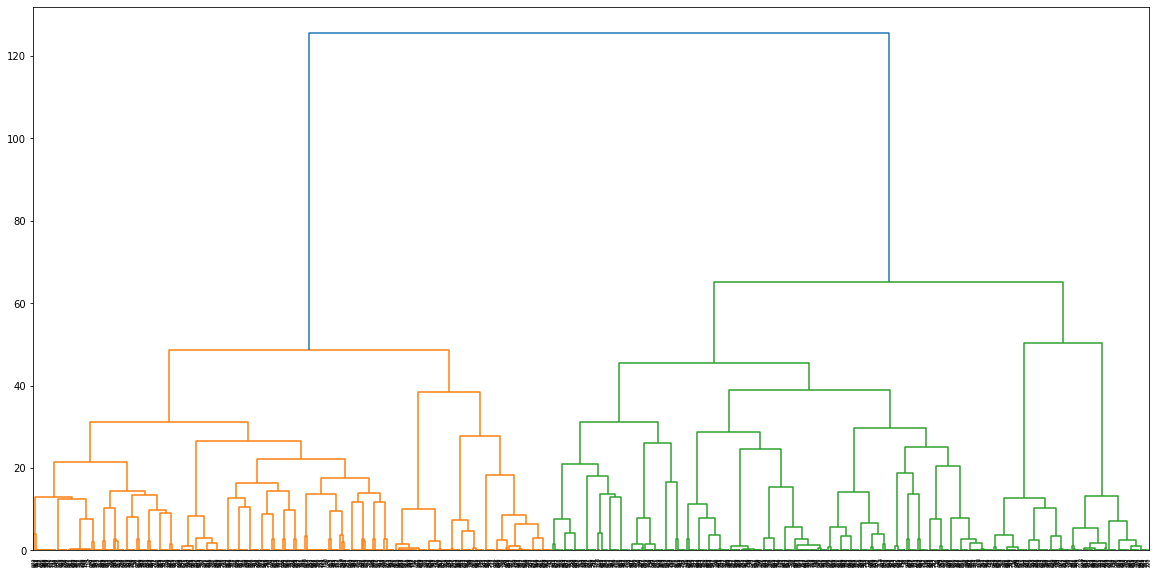

In [94]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

DBSCAN ile deneme yapalım.

In [95]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

clusters = dbscan_cluster.fit_predict(X_std)
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.07939764683098224


In [96]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: 0.7964774993283941


Silhouette değeri 1 e yakın çıktı.

eps ve min sample sayılarını değiştirelim.

In [97]:
dbscan_cluster = DBSCAN(eps=3, min_samples=4)

clusters = dbscan_cluster.fit_predict(X_std)
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.14415209608086718
DBSCAN çözümünün siluet skoru: 0.6877320196850256


In [102]:
dbscan_cluster_i = DBSCAN(eps=3, min_samples=20)

clusters_i = dbscan_cluster_i.fit_predict(X_std)
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters_i)))
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters_i, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.16392897211392876
DBSCAN çözümünün siluet skoru: 0.3893423408425441


Değerler düşüş yaşadı.

In [104]:
dbscan_cluster = DBSCAN(eps=5, min_samples=33)

clusters = dbscan_cluster.fit_predict(X_std)
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.008838644404904552
DBSCAN çözümünün siluet skoru: 0.0937190545871022


eps 2 ve min samples 5 iken en iyi değerler elde edildi.

#### GMM İle Çalışalım.

In [105]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
clusters = gmm_cluster.fit_predict(X_std)
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI: 0.385
GMM çözümünün siluet skoru 0.3176058988360639


Değerlerimiz düşük çıktı.

covariance_type parametresini değiştirerek sonuçların nasıl değiştiğine bakalım.

In [109]:
gmm_cluster_tied = GaussianMixture(n_components=3, random_state=123 ,covariance_type = 'tied' )
clusters_tied = gmm_cluster_tied.fit_predict(X_std)
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_tied)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_tied, metric='euclidean')))

ARI: 0.357
GMM çözümünün siluet skoru 0.22997536741346963


In [112]:
gmm_cluster_diag = GaussianMixture(n_components=3, random_state=123 ,covariance_type = 'diag' )
clusters_diag = gmm_cluster_diag.fit_predict(X_std)
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_diag)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_diag, metric='euclidean')))

ARI: 0.357
GMM çözümünün siluet skoru 0.22997536741346963


In [113]:
gmm_cluster_spherical = GaussianMixture(n_components=3, random_state=123 ,covariance_type = 'spherical' )
clusters_spherical= gmm_cluster_spherical.fit_predict(X_std)
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_spherical)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_spherical, metric='euclidean')))

ARI: 0.333
GMM çözümünün siluet skoru 0.20714611154604987
